Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:

List down the features and their types (e.g., numeric, nominal) available in the dataset.

Create a histogram for each feature in the dataset to illustrate the feature distributions.

Create a box plot for each feature in the dataset.

Compare distributions and identify outliers

In [1]:
import seaborn as sns

In [2]:
dataset = sns.load_dataset("iris")

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='Count'>

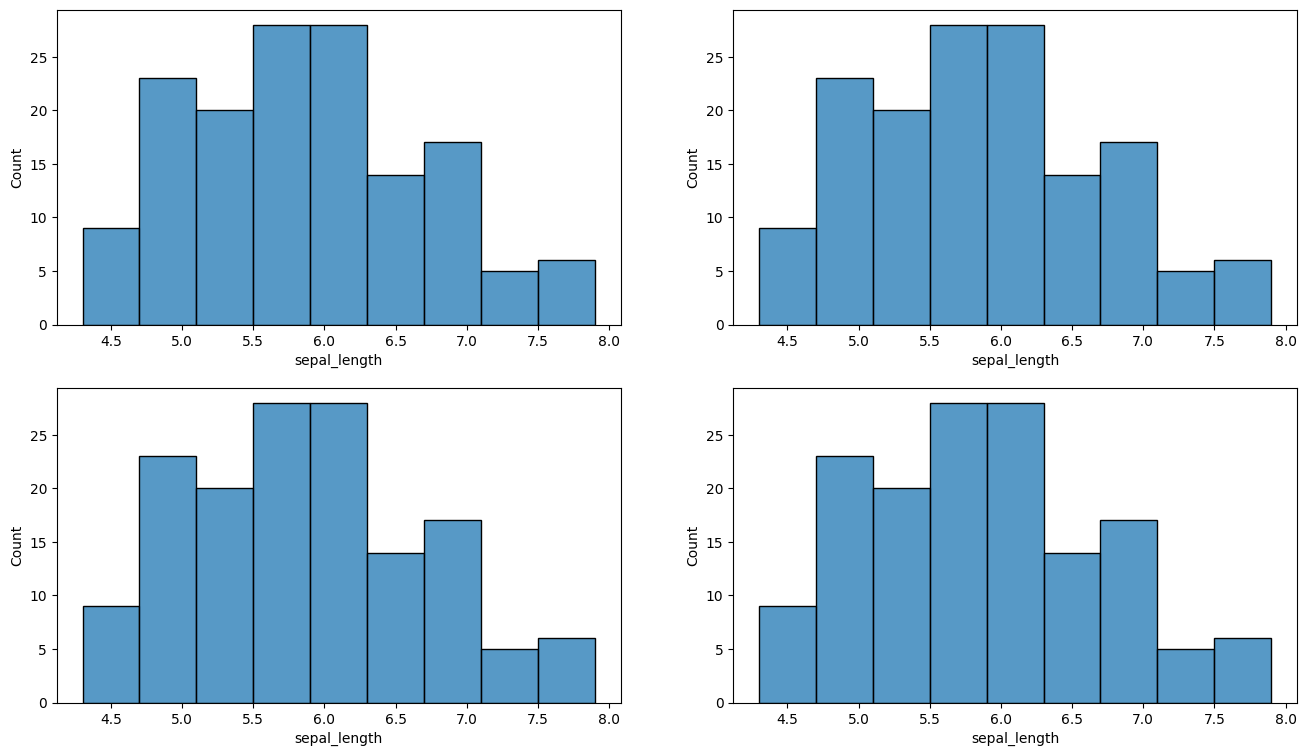

In [4]:
import matplotlib.pyplot as plt
fig, axes=plt.subplots(2,2,figsize=(16,9))
sns.histplot(dataset["sepal_length"],ax=axes[0,0])
sns.histplot(dataset["sepal_length"],ax=axes[0,1])
sns.histplot(dataset["sepal_length"],ax=axes[1,0])
sns.histplot(dataset["sepal_length"],ax=axes[1,1])

<Axes: xlabel='species', ylabel='petal_width'>

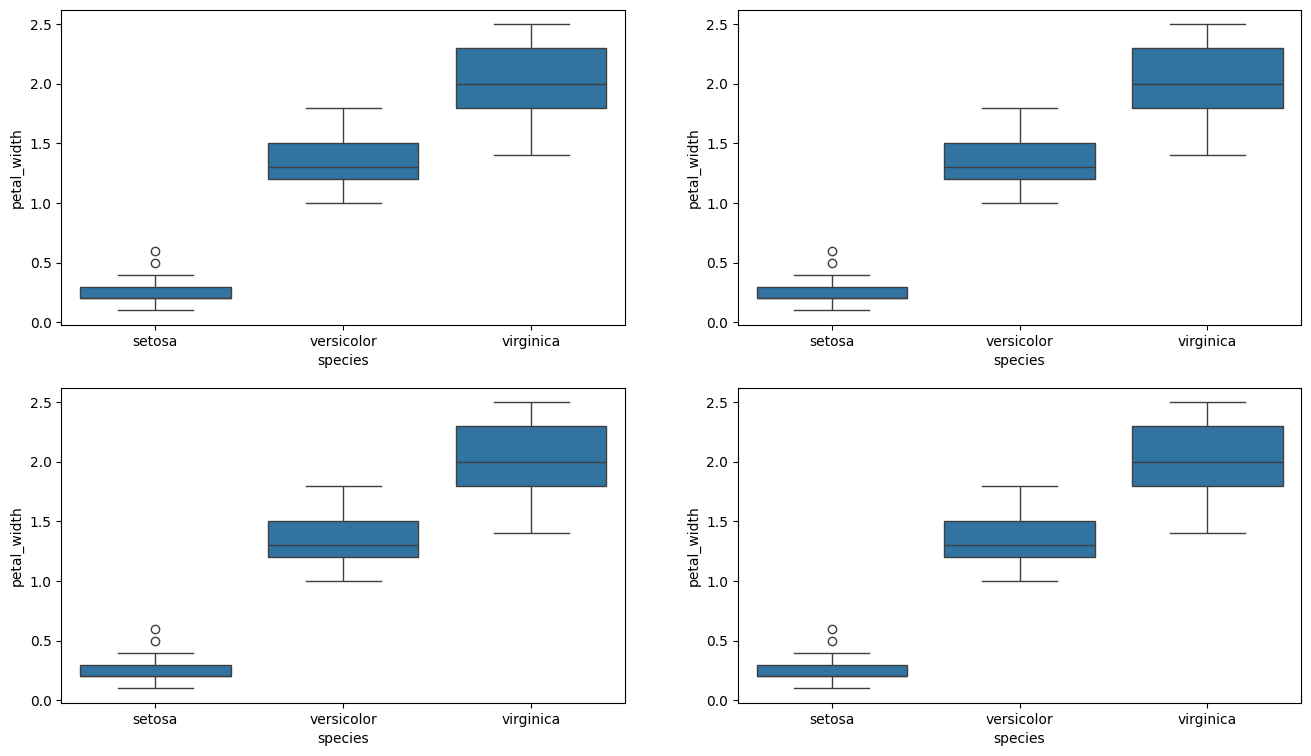

In [5]:
import matplotlib.pyplot as plt
fig, axes =plt.subplots(2,2,figsize =(16,9))
sns.boxplot(y='petal_width', x='species',data=dataset, ax=axes[0,0])
sns.boxplot(y='petal_width', x='species',data=dataset, ax=axes[0,1])
sns.boxplot(y='petal_width', x='species',data=dataset, ax=axes[1,0])
sns.boxplot(y='petal_width', x='species',data=dataset, ax=axes[1,1])


In [7]:
iris_df=dataset

In [8]:
# Summary statistics of the dataset
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


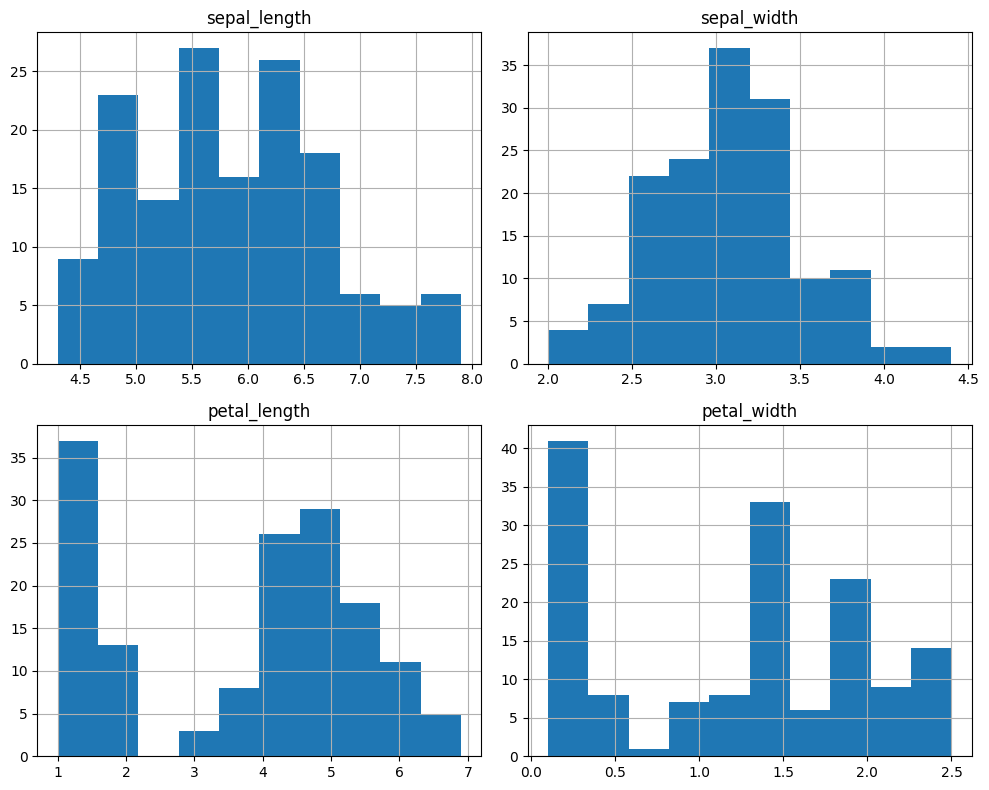

In [9]:
# Histogram for each feature
iris_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

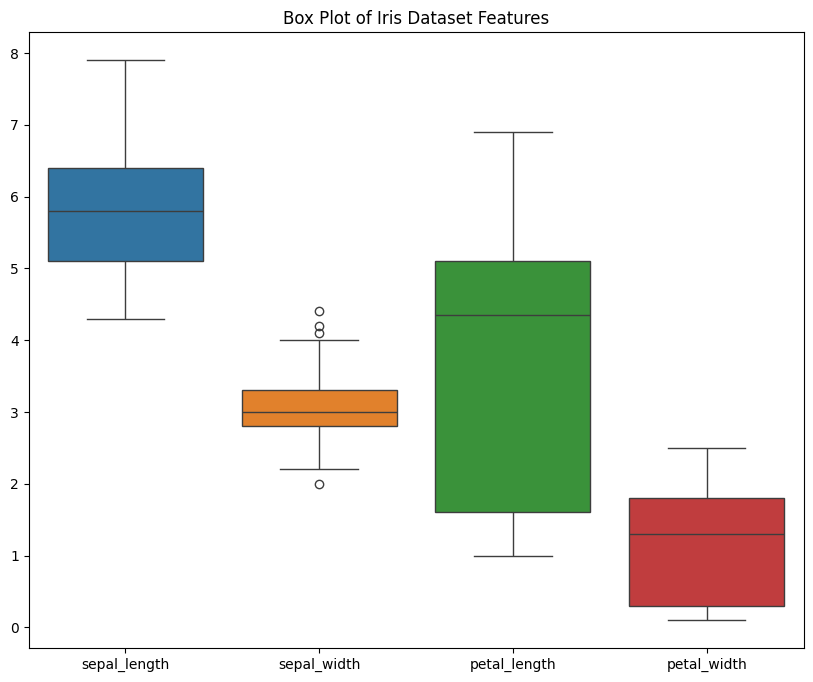

In [17]:
# Creating box plots for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_df)
plt.title("Box Plot of Iris Dataset Features")
plt.show()

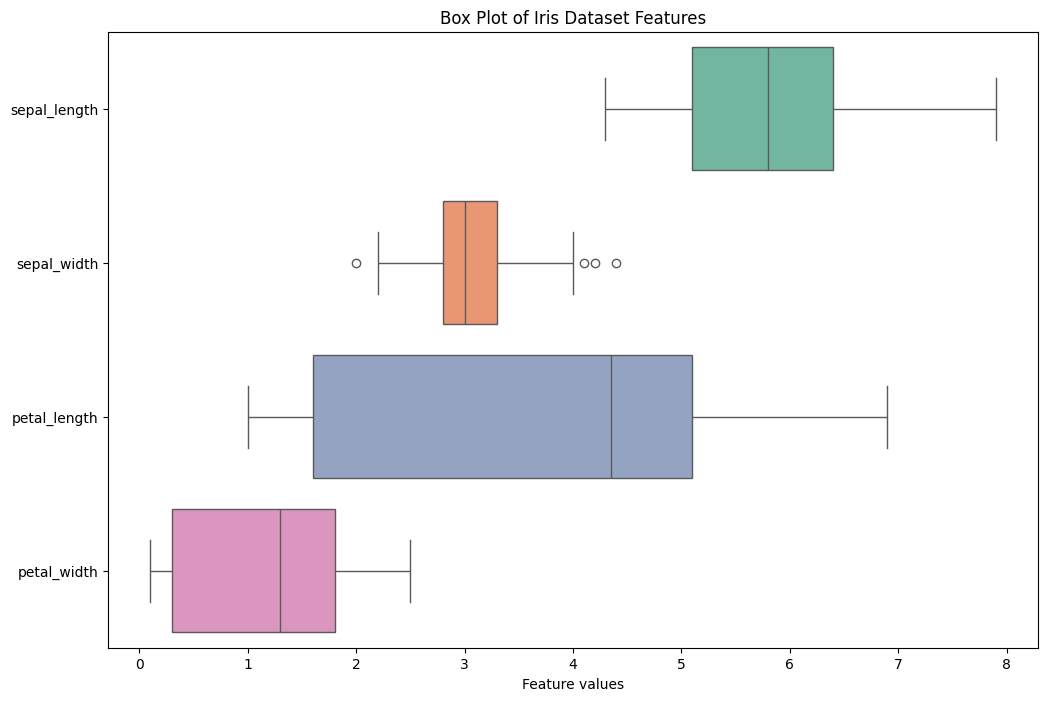

In [16]:
# Create box plots for each feature
plt.figure(figsize=(12, 8))
if 'class' in iris_df.columns:
    sns.boxplot(data=iris_df.drop(columns='class'), orient='h', palette='Set2')
else:
    sns.boxplot(data=iris_df, orient='h', palette='Set2')  # If 'class' column is already removed
plt.title('Box Plot of Iris Dataset Features')
plt.xlabel('Feature values')
plt.show()

In [ ]:
# Identify outliers
def identify_outliers(df):
    outliers = {}
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = identify_outliers(iris_df)
for column, outlier_df in outliers.items():
    print(f"Outliers in {column}:")
    print(outlier_df)


In [14]:
outliers = identify_outliers(iris_df)
for column, outlier_df in outliers.items():
    print(f"Outliers in {column}:")
    print(outlier_df)

Outliers in sepal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
Outliers in sepal_width:
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor
Outliers in petal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
Outliers in petal_width:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


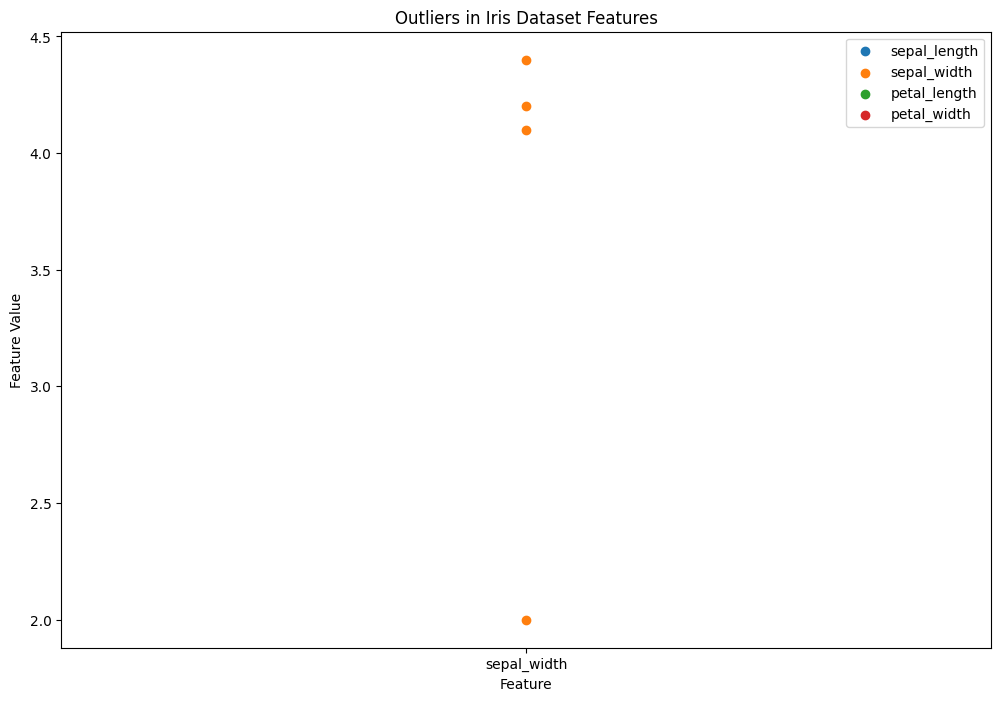

In [18]:
# Create scatter plots for outliers
plt.figure(figsize=(12, 8))
for column, outlier_df in outliers.items():
    plt.scatter([column] * len(outlier_df), outlier_df[column], label=column)

plt.title('Outliers in Iris Dataset Features')
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.legend()
plt.show()